# Data Visualization

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

In [2]:
data=pd.read_csv(r'C:\Users\NaveenNani\OneDrive\Desktop\Desktop\Cleaned_Data_Imdb.csv')

In [3]:
data.head()

Unnamed: 0          Movie Name  Year  Run Time Certificate  Rating  \
0           0       The Godfather  1972       175           A     9.2   
1           1          Goodfellas  1990       145           A     8.7   
2           2        Pulp Fiction  1994       154           A     8.9   
3           3  The Usual Suspects  1995       106           A     8.5   
4           4      Apocalypse Now  1979       147           R     8.5   

                                 Genre   Votes  Gross in M $  
0             Crime, Drama              408693        435.11  
1  Biography, Crime, Drama               31290         13.56  
2             Crime, Drama              788510        380.26  
3    Crime, Drama, Mystery              179202         11.50  
4      Drama, Mystery, War               74217          8.62

# Dropping Unnamed & index column

In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data

Movie Name  Year  Run Time Certificate  Rating  \
0                The Godfather  1972       175           A     9.2   
1                   Goodfellas  1990       145           A     8.7   
2                 Pulp Fiction  1994       154           A     8.9   
3           The Usual Suspects  1995       106           A     8.5   
4               Apocalypse Now  1979       147           R     8.5   
..                         ...   ...       ...         ...     ...   
525   Ferris Bueller's Day Off  1986       103           U     7.8   
526  I Love You Phillip Morris  2009       102           R     6.6   
527                      Choke  2008        92           R     6.4   
528              The Conjuring  2013       112           A     7.5   
529                  Body Heat  1981       113          18     7.4   

                                     Genre   Votes  Gross in M $  
0                 Crime, Drama              408693        435.11  
1      Biography, Crime, Drama               31290         13.56  
2                 Crime, Drama              788510        380.26  
3        Crime, Drama, Mystery              179202         11.50  
4          Drama, Mystery, War               74217          8.62  
..                                     ...     ...           ...  
525                     Comedy              358202         70.14  
526   Biography, Comedy, Crime               96420          2.04  
527              Comedy, Drama               32753          2.93  
528  Horror, Mystery, Thriller              507280        137.40  
529      Crime, Drama, Romance               36182         24.06  

[530 rows x 8 columns]

In [6]:
data.rename(columns = {'Run Time':'Run_Time_in_min'}, inplace = True)
data.head()

Movie Name  Year  Run_Time_in_min Certificate  Rating  \
0       The Godfather  1972              175           A     9.2   
1          Goodfellas  1990              145           A     8.7   
2        Pulp Fiction  1994              154           A     8.9   
3  The Usual Suspects  1995              106           A     8.5   
4      Apocalypse Now  1979              147           R     8.5   

                                 Genre   Votes  Gross in M $  
0             Crime, Drama              408693        435.11  
1  Biography, Crime, Drama               31290         13.56  
2             Crime, Drama              788510        380.26  
3    Crime, Drama, Mystery              179202         11.50  
4      Drama, Mystery, War               74217          8.62

In [7]:
data.rename(columns = {'Movie Name':'Movie_Name'}, inplace = True)
data.head()

Movie_Name  Year  Run_Time_in_min Certificate  Rating  \
0       The Godfather  1972              175           A     9.2   
1          Goodfellas  1990              145           A     8.7   
2        Pulp Fiction  1994              154           A     8.9   
3  The Usual Suspects  1995              106           A     8.5   
4      Apocalypse Now  1979              147           R     8.5   

                                 Genre   Votes  Gross in M $  
0             Crime, Drama              408693        435.11  
1  Biography, Crime, Drama               31290         13.56  
2             Crime, Drama              788510        380.26  
3    Crime, Drama, Mystery              179202         11.50  
4      Drama, Mystery, War               74217          8.62

In [8]:
data.shape

(530, 8)

In [9]:
data.isnull().sum()

Movie_Name         0
Year               0
Run_Time_in_min    0
Certificate        0
Rating             0
Genre              0
Votes              0
Gross in M $       0
dtype: int64

In [10]:
data.mean()

C:\Users\NaveenNani\AppData\Local\Temp\ipykernel_6112\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Year                 1995.343396
Run_Time_in_min       119.505660
Rating                  7.665849
Votes              203342.647170
Gross in M $           60.538226
dtype: float64

In [11]:
data.median()

C:\Users\NaveenNani\AppData\Local\Temp\ipykernel_6112\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Year                 1999.0
Run_Time_in_min       115.0
Rating                  7.7
Votes              106295.5
Gross in M $           17.0
dtype: float64

In [12]:
data.mode()

Movie_Name    Year  Run_Time_in_min Certificate  Rating  \
0                  12 Angry Men  2002.0            107.0           A     7.5   
1         2001: A Space Odyssey     NaN              NaN         NaN     NaN   
2                      21 Grams     NaN              NaN         NaN     NaN   
3                22 Jump Street     NaN              NaN         NaN     NaN   
4          24 Hour Party People     NaN              NaN         NaN     NaN   
..                          ...     ...              ...         ...     ...   
525  X-Men: Days of Future Past     NaN              NaN         NaN     NaN   
526                          X2     NaN              NaN         NaN     NaN   
527                 You're Next     NaN              NaN         NaN     NaN   
528                      Zodiac     NaN              NaN         NaN     NaN   
529                  Zombieland     NaN              NaN         NaN     NaN   

                        Genre    Votes  Gross in M $  
0    Crime, Drama               7565.0         15.54  
1                         NaN  11042.0           NaN  
2                         NaN  15812.0           NaN  
3                         NaN  18124.0           NaN  
4                         NaN  20523.0           NaN  
..                        ...      ...           ...  
525                       NaN      NaN           NaN  
526                       NaN      NaN           NaN  
527                       NaN      NaN           NaN  
528                       NaN      NaN           NaN  
529                       NaN      NaN           NaN  

[530 rows x 8 columns]

In [13]:
data.describe()

Year  Run_Time_in_min      Rating         Votes  Gross in M $
count   530.000000       530.000000  530.000000  5.300000e+02    530.000000
mean   1995.343396       119.505660    7.665849  2.033426e+05     60.538226
std      14.785901        24.144277    0.547121  2.432868e+05    108.658306
min    1939.000000        78.000000    5.800000  2.658000e+03      0.010000
25%    1988.000000       103.000000    7.300000  5.418500e+04      3.370000
50%    1999.000000       115.000000    7.700000  1.062955e+05     17.000000
75%    2006.000000       130.000000    8.000000  2.376190e+05     70.140000
max    2019.000000       238.000000    9.300000  1.242270e+06    760.510000

In [14]:
data.loc[:,['Year']].var()

Year    218.622877
dtype: float64

In [15]:
data.loc[:,['Run_Time_in_min']].var()

Run_Time_in_min    582.946093
dtype: float64

In [16]:
data.loc[:,['Rating']].var()

Rating    0.299342
dtype: float64

In [17]:
data.loc[:,['Votes']].var()

Votes    5.918849e+10
dtype: float64

In [18]:
data.loc[:,['Gross in M $']].var()

Gross in M $    11806.627426
dtype: float64

In [19]:
data.loc[:,['Year']].std()

Year    14.785901
dtype: float64

In [20]:
data.loc[:,['Run_Time_in_min']].std()

Run_Time_in_min    24.144277
dtype: float64

In [21]:
data.loc[:,['Votes']].std()

Votes    243286.845836
dtype: float64

In [22]:
data.loc[:,['Gross in M $']].std()

Gross in M $    108.658306
dtype: float64

In [23]:
data.rename(columns = {'Gross in M $':'Gross_in_M_$'}, inplace = True)
data.head()

Movie_Name  Year  Run_Time_in_min Certificate  Rating  \
0       The Godfather  1972              175           A     9.2   
1          Goodfellas  1990              145           A     8.7   
2        Pulp Fiction  1994              154           A     8.9   
3  The Usual Suspects  1995              106           A     8.5   
4      Apocalypse Now  1979              147           R     8.5   

                                 Genre   Votes  Gross_in_M_$  
0             Crime, Drama              408693        435.11  
1  Biography, Crime, Drama               31290         13.56  
2             Crime, Drama              788510        380.26  
3    Crime, Drama, Mystery              179202         11.50  
4      Drama, Mystery, War               74217          8.62

# EDA

# Univariate Analysis

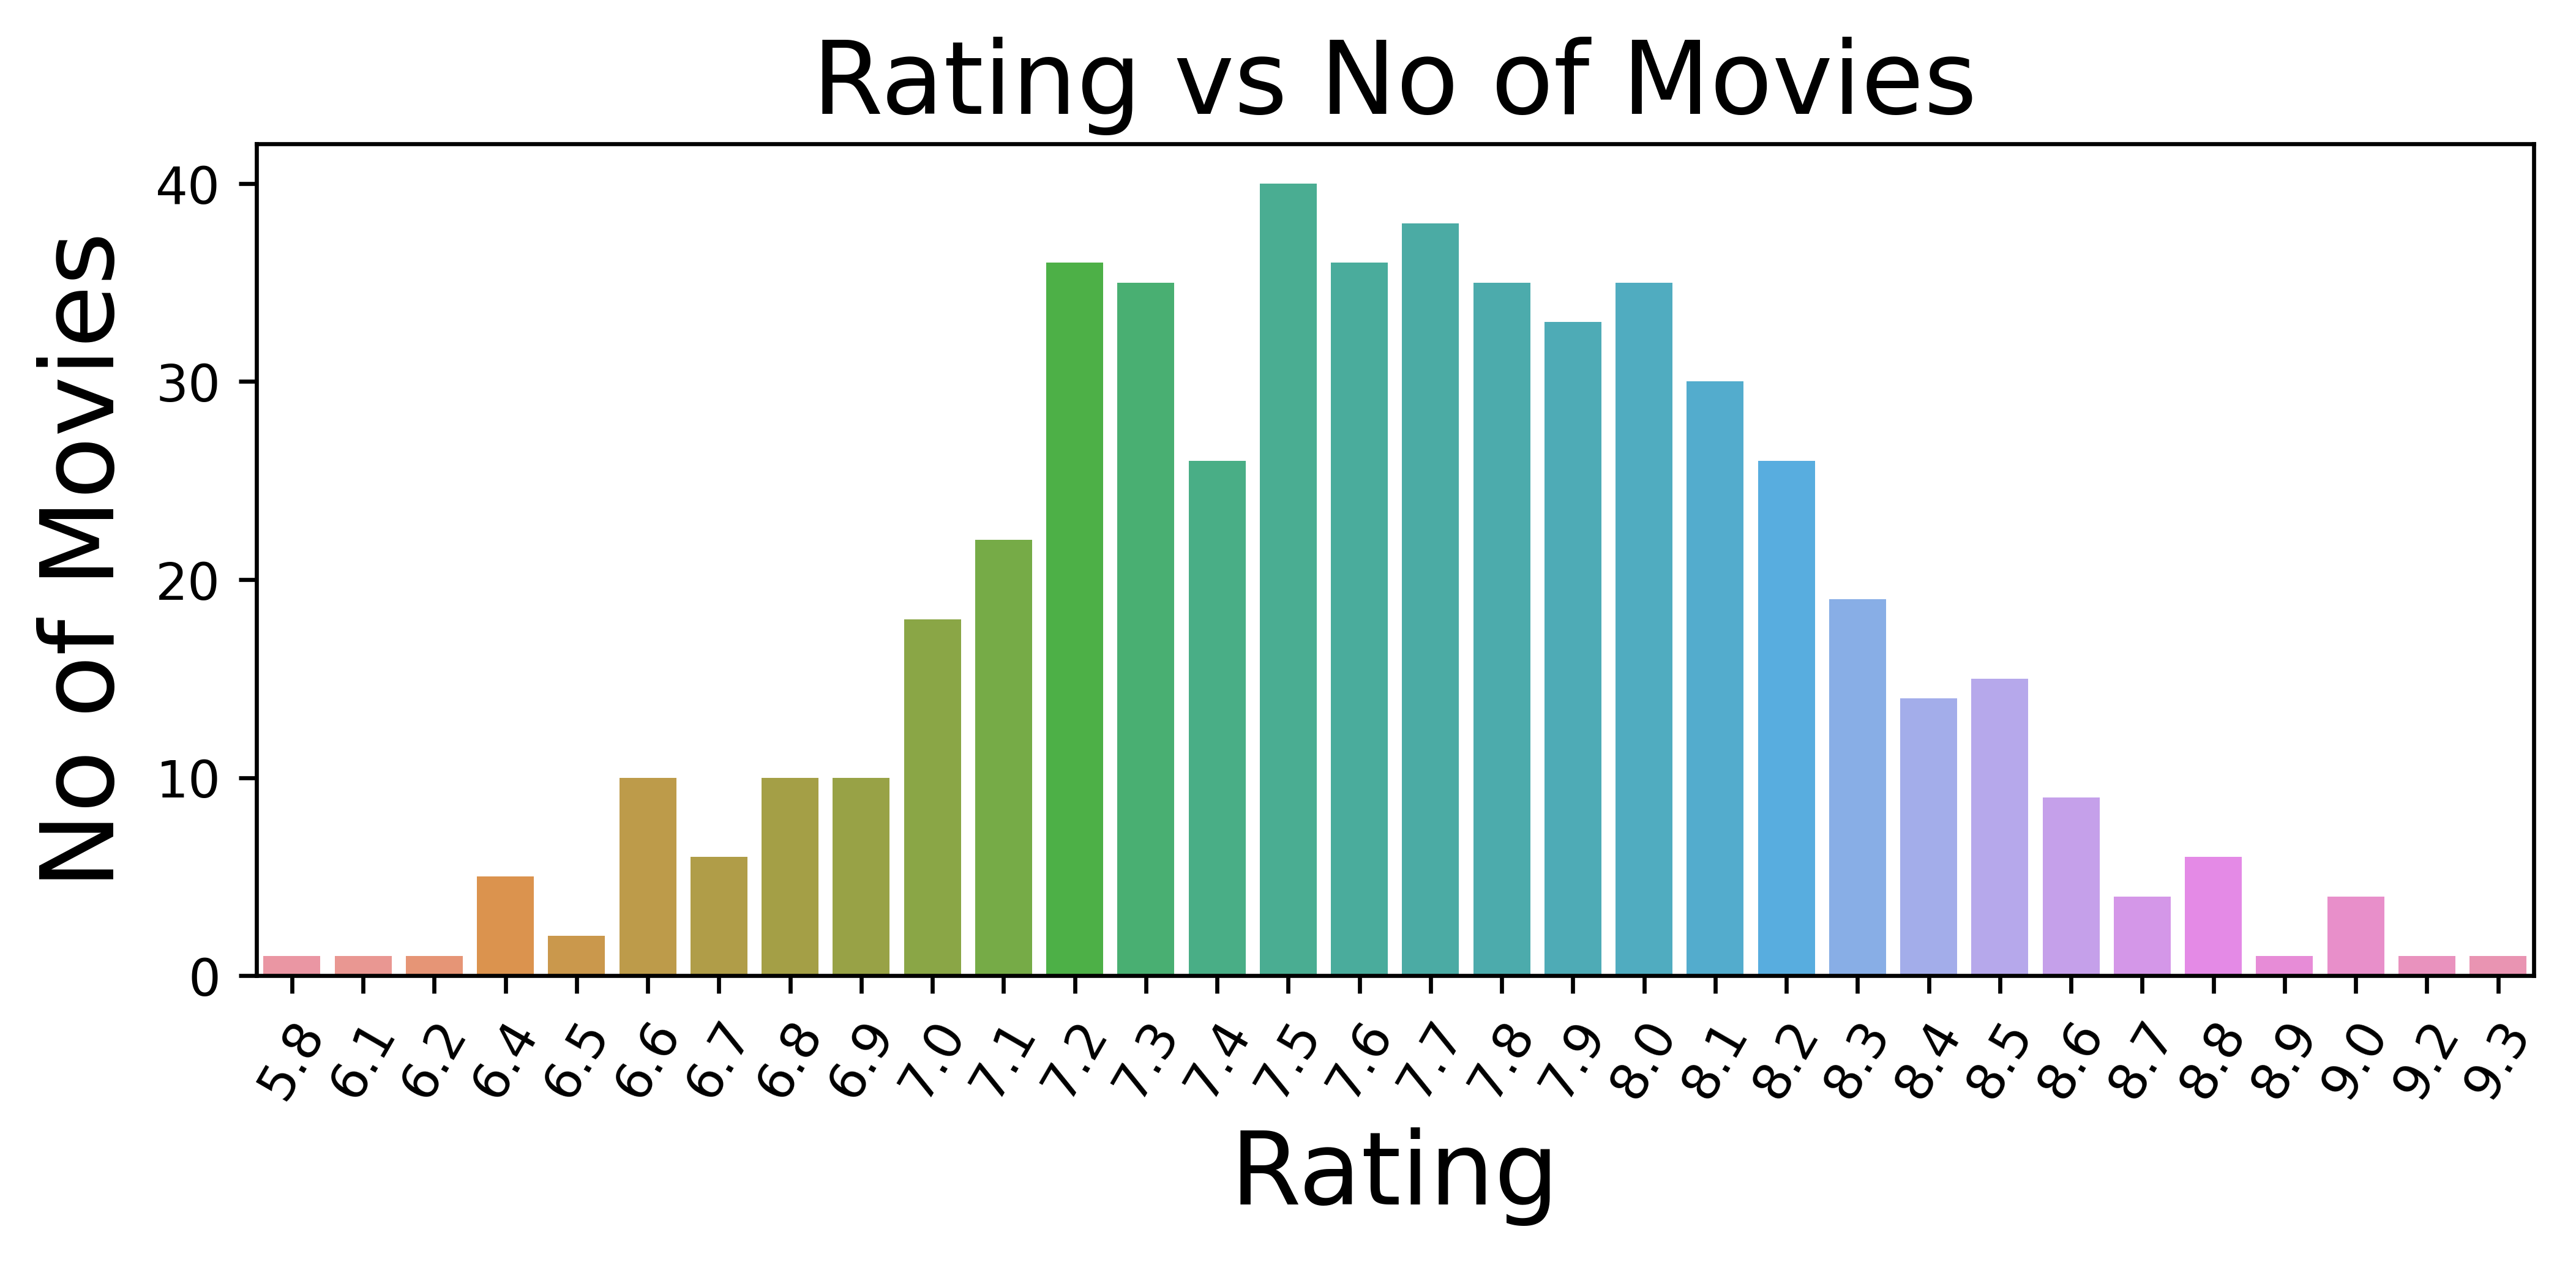

In [24]:
# counter plot

plt.figure(figsize=(8,3),dpi=600)
sns.countplot(data = data,x = 'Rating')
plt.xticks(rotation = 60)
plt.xlabel('Rating',fontsize=20)
plt.ylabel('No of Movies',fontsize=20)
plt.title('Rating vs No of Movies',fontsize=20);

### From this analysis of the list of movies most of the movies given 7.5 rating.

In [27]:
# Here are the movies which are rated 7.5

data[data['Rating']==7.5]

Movie_Name  Year  Run_Time_in_min  \
64                                      The Wicker Man  1973               88   
116                     An American Werewolf in London  1981               97   
122  Interview with the Vampire: The Vampire Chroni...  1994              123   
137                                   28 Days Later...  2002              113   
146                                          Braindead  1992              104   
162                                          Quiz Show  1994              133   
164                                               Juno  2007               96   
166                                Kiss Kiss Bang Bang  2005              103   
167                                       Jackie Brown  1997              154   
168                                           Sideways  2004              127   
185                                    Fahrenheit 9/11  2004              122   
194                                      A Quiet Place  2018               90   
197                                               Hugo  2011              126   
250                        Scott Pilgrim vs. the World  2010              112   
251                                      The Producers  1967               88   
274                                    Field of Dreams  1989              107   
279                                        Hodejegerne  2011              100   
297                                       The Imposter  2012               99   
308                                         Collateral  2004              120   
318                               Jûsan-nin no shikaku  2010              141   
328                                    The Fisher King  1991              137   
343                                        The Aviator  2004              170   
346                                 A Hard Day's Night  1964               87   
352                                 L'instinct de mort  2008              113   
358                                           I, Tonya  2017              119   
369                                    The Hurt Locker  2008              131   
370                                       Santa Sangre  1989              123   
371                                  Gangs of New York  2002              167   
374                                           The Omen  1976              111   
393                                       Total Recall  1990              113   
396                              Taxi to the Dark Side  2007              106   
399                                  Leaving Las Vegas  1995              111   
414                                       Midnight Run  1988              126   
428                                          The Abyss  1989              140   
434                                             Munich  2005              164   
458                                A Fish Called Wanda  1988              108   
471                                      A Simple Plan  1998              121   
472                                           Sleepers  1996              147   
506                                          Pinocchio  1940               88   
528                                      The Conjuring  2013              112   

    Certificate  Rating                                      Genre   Votes  \
64    Not Rated     7.5      Horror, Mystery, Thriller               97315   
116           A     7.5                 Comedy, Horror               15812   
122           A     7.5         Drama, Fantasy, Horror              736928   
137           A     7.5          Drama, Horror, Sci-Fi              135669   
146           R     7.5        Comedy, Fantasy, Horror              264816   
162           U     7.5      Biography, Drama, History               84027   
164          16     7.5                  Comedy, Drama               55097   
166           A     7.5         Comedy, Crime, Mystery              237619   
167         15+     

## Coun plot on Release year vs no.of movies released

In [28]:
# Coun plot on Release year vs no.of movies released

plt.figure(figsize=(20,8),dpi=800)
sns.countplot(data = data,x = 'Year')
plt.xticks(rotation = 90)
plt.xlabel('Year',fontsize=20)
plt.ylabel('No of Movies',fontsize=20)
plt.title('Year (vs) No of Movies',fontsize=30);

### From this got to know that most of the movies are released in the year 2002

In [29]:
# Here are the movies which are released in the year 2002

data[data['Year']==2002]

Movie_Name  Year  Run_Time_in_min Certificate  \
31                          Cidade de Deus  2002              130           A   
78                   Bowling for Columbine  2002              120           U   
85                         Minority Report  2002              145           A   
111                      Road to Perdition  2002              117           A   
115                    The Bourne Identity  2002              119          UA   
131  The Lord of the Rings: The Two Towers  2002              179          UA   
137                       28 Days Later...  2002              113           A   
142                The Rules of Attraction  2002              110   Not Rated   
180                    Catch Me If You Can  2002              141           A   
205                           Dog Soldiers  2002              105           A   
224                     Jackass: The Movie  2002               85           A   
288                               Insomnia  2002              118          UA   
293                   24 Hour Party People  2002              117           R   
300                             Spider-Man  2002              121           U   
367                                 8 Mile  2002              110          UA   
371                      Gangs of New York  2002              167           A   
388                              25th Hour  2002              135           R   
460        Confessions of a Dangerous Mind  2002              113           R   
481                            Adaptation.  2002              115           R   
483                       Punch-Drunk Love  2002               95           R   
487                           Irréversible  2002               97           A   
505                             In America  2002              105       PG-13   
509                              Secretary  2002              107           A   
524           The Kid Stays in the Picture  2002               93           R   

     Rating                                    Genre   Votes  Gross_in_M_$  
31      8.6                 Crime, Drama              336312         83.82  
78      8.0    Documentary, Crime, Drama              161652         16.03  
85      7.7       Action, Crime, Mystery              220829         92.82  
111     7.7       Crime, Drama, Thriller               18124          2.78  
115     7.9    Action, Mystery, Thriller               30027          0.28  
131     8.8     Action, Adventure, Drama               11042          1.82  
137     7.5        Drama, Horror, Sci-Fi              135669          0.75  
142     6.6       Comedy, Drama, Romance              389978        134.51  
180     8.1      Biography, Crime, Drama              358202         70.14  
205     6.8     Action, Horror, Thriller               72390          7.92  
224     6.6  Documentary, Action, Comedy              222382         93.93  
288     7.2     Drama, Mystery, Thriller               48060         30.93  
293     7.3     Biography, Comedy, Drama               72390          7.92  
300     7.4    Action, Adventure, Sci-Fi              668943         32.00  
367     7.2                 Drama, Music               43049          3.23  
371     7.5                 Crime, Drama               20523          3.17  
388     7.6                        Drama              163335         13.76  
460     7.0     Biography, Comedy, Crime               88779         16.00  
481     7.7                Comedy, Drama              193314         22.25  
483     7.3       Comedy, Drama, Romance              165747         17.84  
487     7.3        Crime, Drama, Mystery              135669          0.75  
505     7.7                        Drama               43310         15.54  
509     6.9       Comedy, Drama, Romance               92036          4.06  
524     7.3       Documentary, Biography                7565          1.43

## Counter plot on Genre column

In [30]:
# From this i have analyzed that most of the movies are DRAMA & CRIME 

plt.figure(figsize=(50,8),dpi=600)
sns.countplot(data = data,x = 'Genre')
plt.xticks(rotation = 90)
plt.xlabel('Genre',loc='left',fontsize=20)
plt.ylabel('No of Movies',fontsize=20)
plt.title('(Genre) vs (No of Movies)',loc='left',fontsize=40);

###  From this i have analyzed that most of the movies are DRAMA & CRIME of genre

# Count plot on Gross column

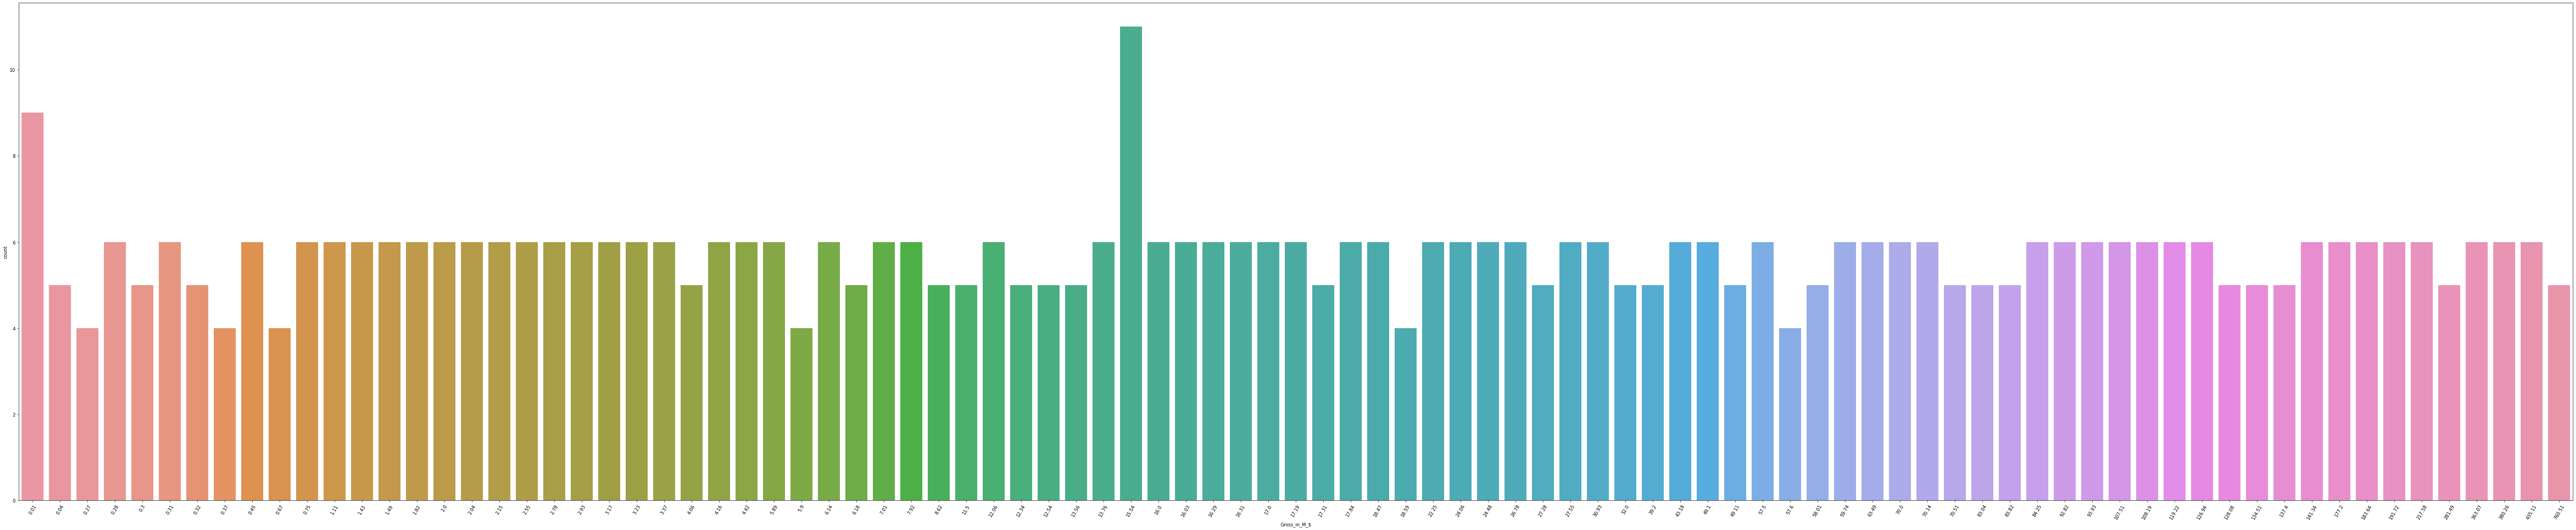

In [31]:
plt.figure(figsize=(100,20))
sns.countplot(data = data,x ='Gross_in_M_$')
plt.xticks(rotation = 60);

In [32]:
# Cant analyze from this plot.So,now we use histogram

In [33]:
data.nlargest(1,'Gross_in_M_$')

Movie_Name  Year  Run_Time_in_min Certificate  Rating  \
32  Once Upon a Time in America  1984              229           A     8.3   

                       Genre    Votes  Gross_in_M_$  
32  Crime, Drama              1242270        760.51

In [34]:
data.nsmallest(1,'Gross_in_M_$')

Movie_Name  Year  Run_Time_in_min Certificate  Rating  \
39  Good Will Hunting  1997              126           U     8.3   

                         Genre  Votes  Gross_in_M_$  
39  Drama, Romance              54413          0.01

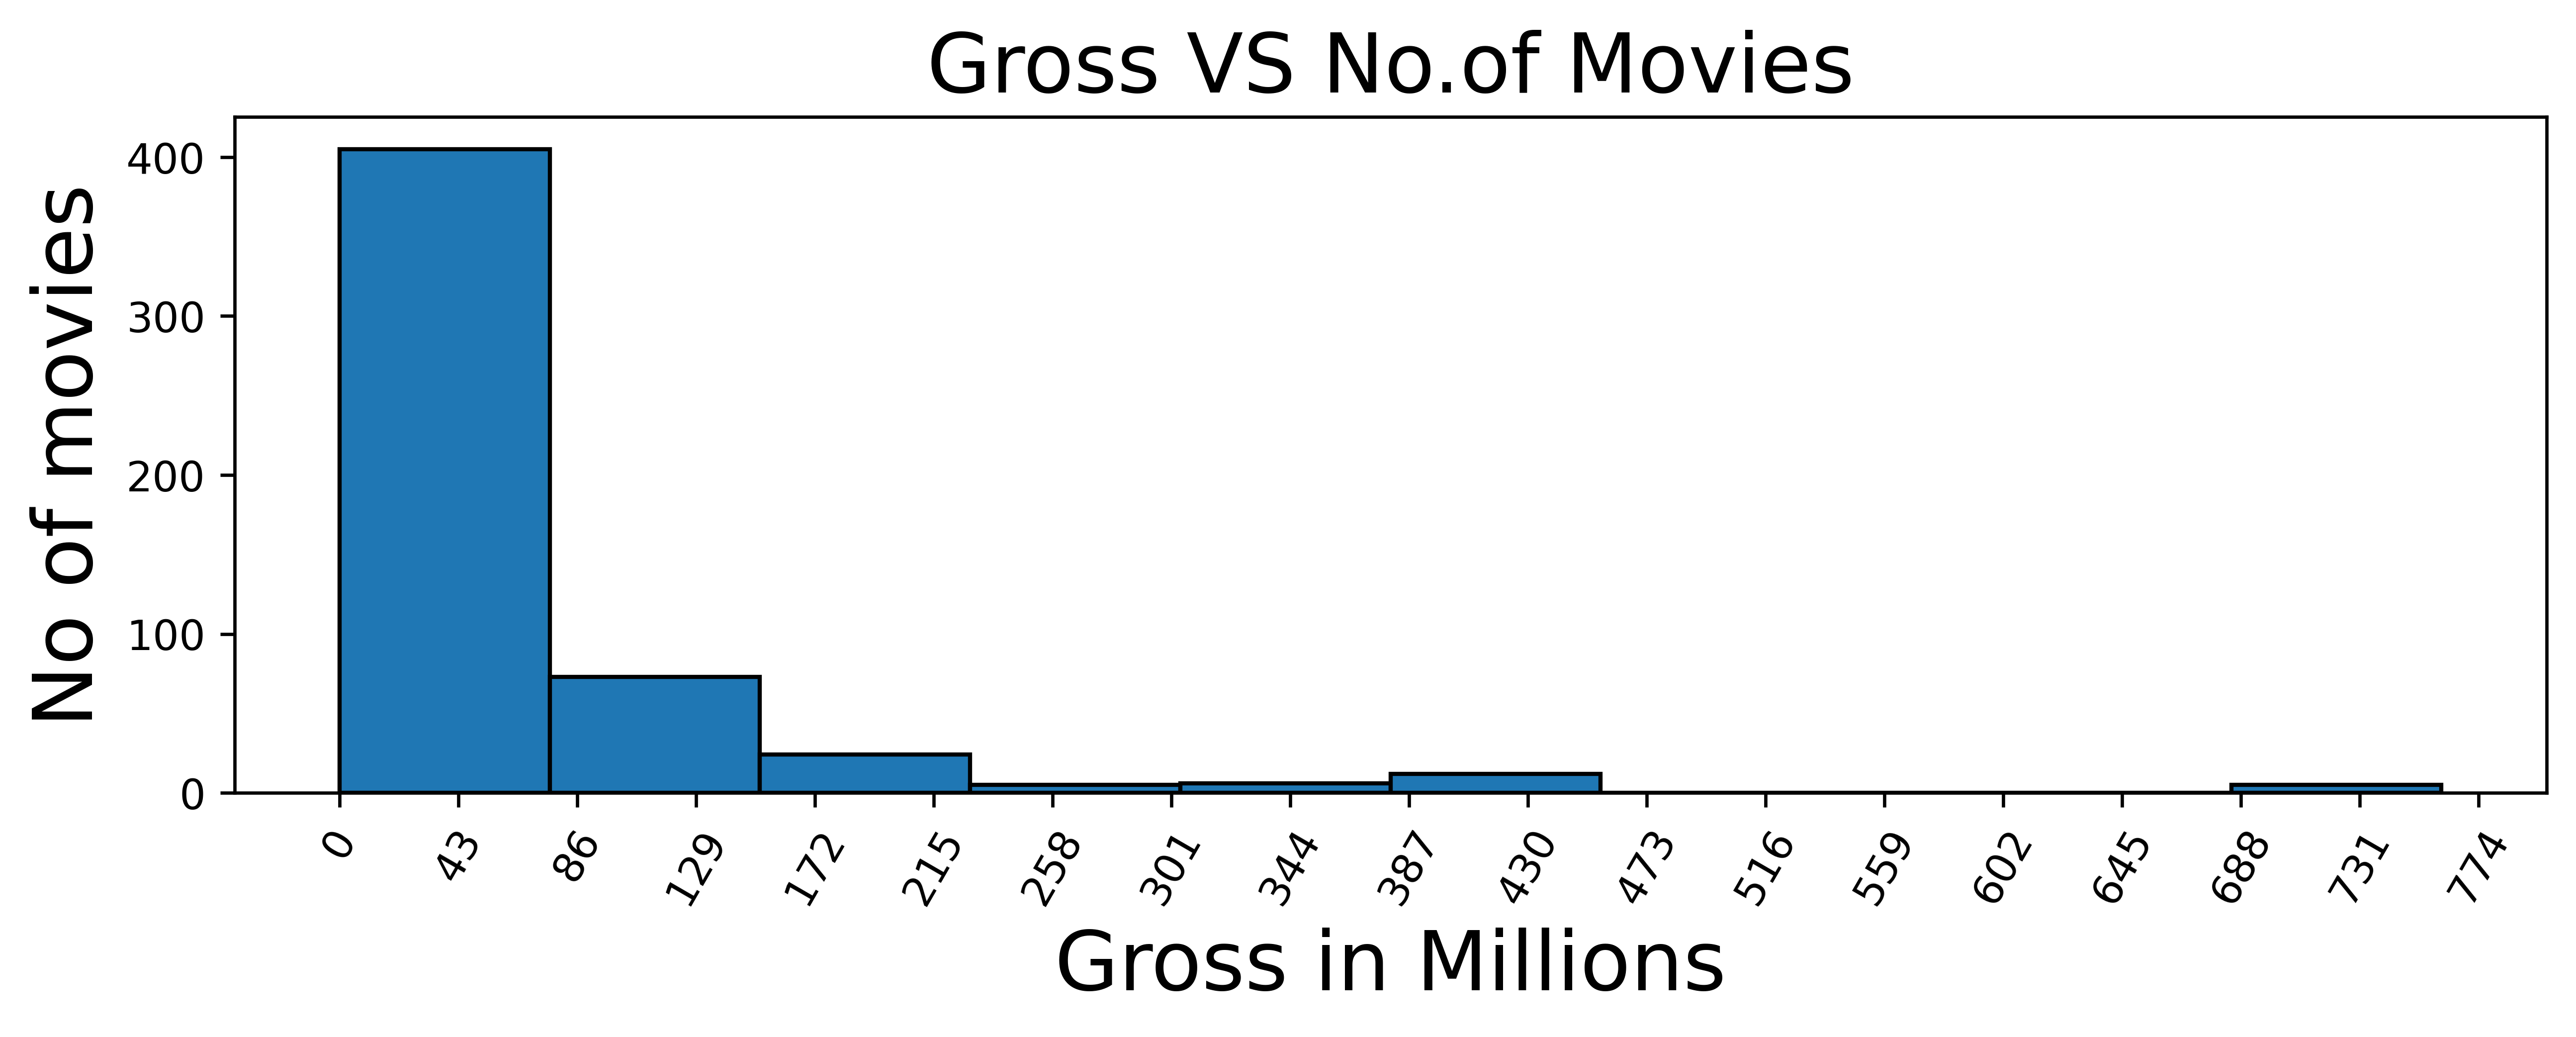

In [35]:
# Histogram

plt.figure(figsize=(10,3),dpi=600)
plt.hist(data = data,x ='Gross_in_M_$',edgecolor='black')
plt.xticks(np.arange(0,800,43),rotation = 60)
plt.xlabel('Gross in Millions',fontsize=20)
plt.ylabel('No of movies',fontsize=20)
plt.title('Gross VS No.of Movies',fontsize=20);

### From this plot i have observed that most of the movies are voted between 3000 & 123000

In [36]:
# These are the movies

data[data['Votes']<=123000]

Movie_Name  Year  Run_Time_in_min Certificate  Rating  \
1                      Goodfellas  1990              145           A     8.7   
4                  Apocalypse Now  1979              147           R     8.5   
5                   Trainspotting  1996               93           A     8.1   
6                      Fight Club  1999              139           A     8.8   
8                   Boogie Nights  1997              155          18     7.9   
..                            ...   ...              ...         ...     ...   
522                   Sling Blade  1996              135           R     8.0   
524  The Kid Stays in the Picture  2002               93           R     7.3   
526     I Love You Phillip Morris  2009              102           R     6.6   
527                         Choke  2008               92           R     6.4   
529                     Body Heat  1981              113          18     7.4   

                                    Genre   Votes  Gross_in_M_$  
1     Biography, Crime, Drama               31290         13.56  
4         Drama, Mystery, War               74217          8.62  
5                       Drama               43049          3.23  
6                       Drama              107535        177.20  
8                       Drama              102718         27.55  
..                                    ...     ...           ...  
522                     Drama               94395         24.48  
524    Documentary, Biography                7565          1.43  
526  Biography, Comedy, Crime               96420          2.04  
527             Comedy, Drama               32753          2.93  
529     Crime, Drama, Romance               36182         24.06  

[293 rows x 8 columns]

## Count plot on Run_Time_in_min

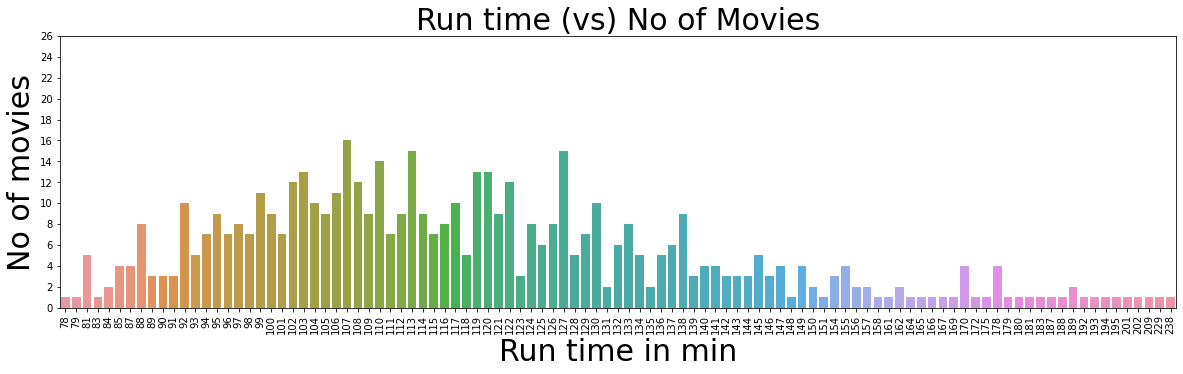

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(data=data,x='Run_Time_in_min')
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,28,2))
plt.xlabel('Run time in min',fontsize=30)
plt.ylabel('No of movies',fontsize=30)
plt.title('Run time (vs) No of Movies',fontsize=30);

### From this plot most of the movies are 107 minutes of rum time

In [39]:
data[data['Run_Time_in_min']==107]

Movie_Name  Year  Run_Time_in_min Certificate  \
33   Lock, Stock and Two Smoking Barrels  1998              107           A   
95                        The Terminator  1984              107          UA   
145           O Brother, Where Art Thou?  2000              107           U   
163                      The Sixth Sense  1999              107           A   
198                             Sunshine  2007              107          UA   
214                  Grosse Pointe Blank  1997              107           U   
274                      Field of Dreams  1989              107           U   
280                      This Is the End  2013              107           A   
315                                 Dig!  2004              107           R   
320                                Rango  2011              107           U   
406                       American Movie  1999              107           R   
445                          Wonder Boys  2000              107           R   
468                       The Other Guys  2010              107           A   
497                             Predator  1987              107           A   
509                            Secretary  2002              107           A   
517                        Adventureland  2009              107          UA   

     Rating                                     Genre   Votes  Gross_in_M_$  
33      8.2         Action, Comedy, Crime               35579          7.01  
95      8.1                Action, Sci-Fi              788510        380.26  
145     7.7      Adventure, Comedy, Crime               85049         12.06  
163     8.2      Drama, Mystery, Thriller              217126         26.78  
198     7.2              Sci-Fi, Thriller              108089        108.19  
214     7.3         Action, Comedy, Crime              201733        126.94  
274     7.5        Drama, Family, Fantasy               36182         24.06  
280     6.6               Comedy, Fantasy              107535        177.20  
315     7.7            Documentary, Music               97613          4.16  
320     7.2  Animation, Action, Adventure              239440         58.01  
406     7.8           Documentary, Comedy              176969          5.89  
445     7.2                 Comedy, Drama               32753          2.93  
468     6.6         Action, Comedy, Crime              269391        119.22  
497     7.8     Action, Adventure, Horror              422988         59.74  
509     6.9        Comedy, Drama, Romance               92036          4.06  
517     6.8        Comedy, Drama, Romance              161652         16.03

# Bi-Varient Analysis

1. Box Plot
2. Bar Plot                 
3. Voilin Plot

## Bar graph for Certificate & Votes

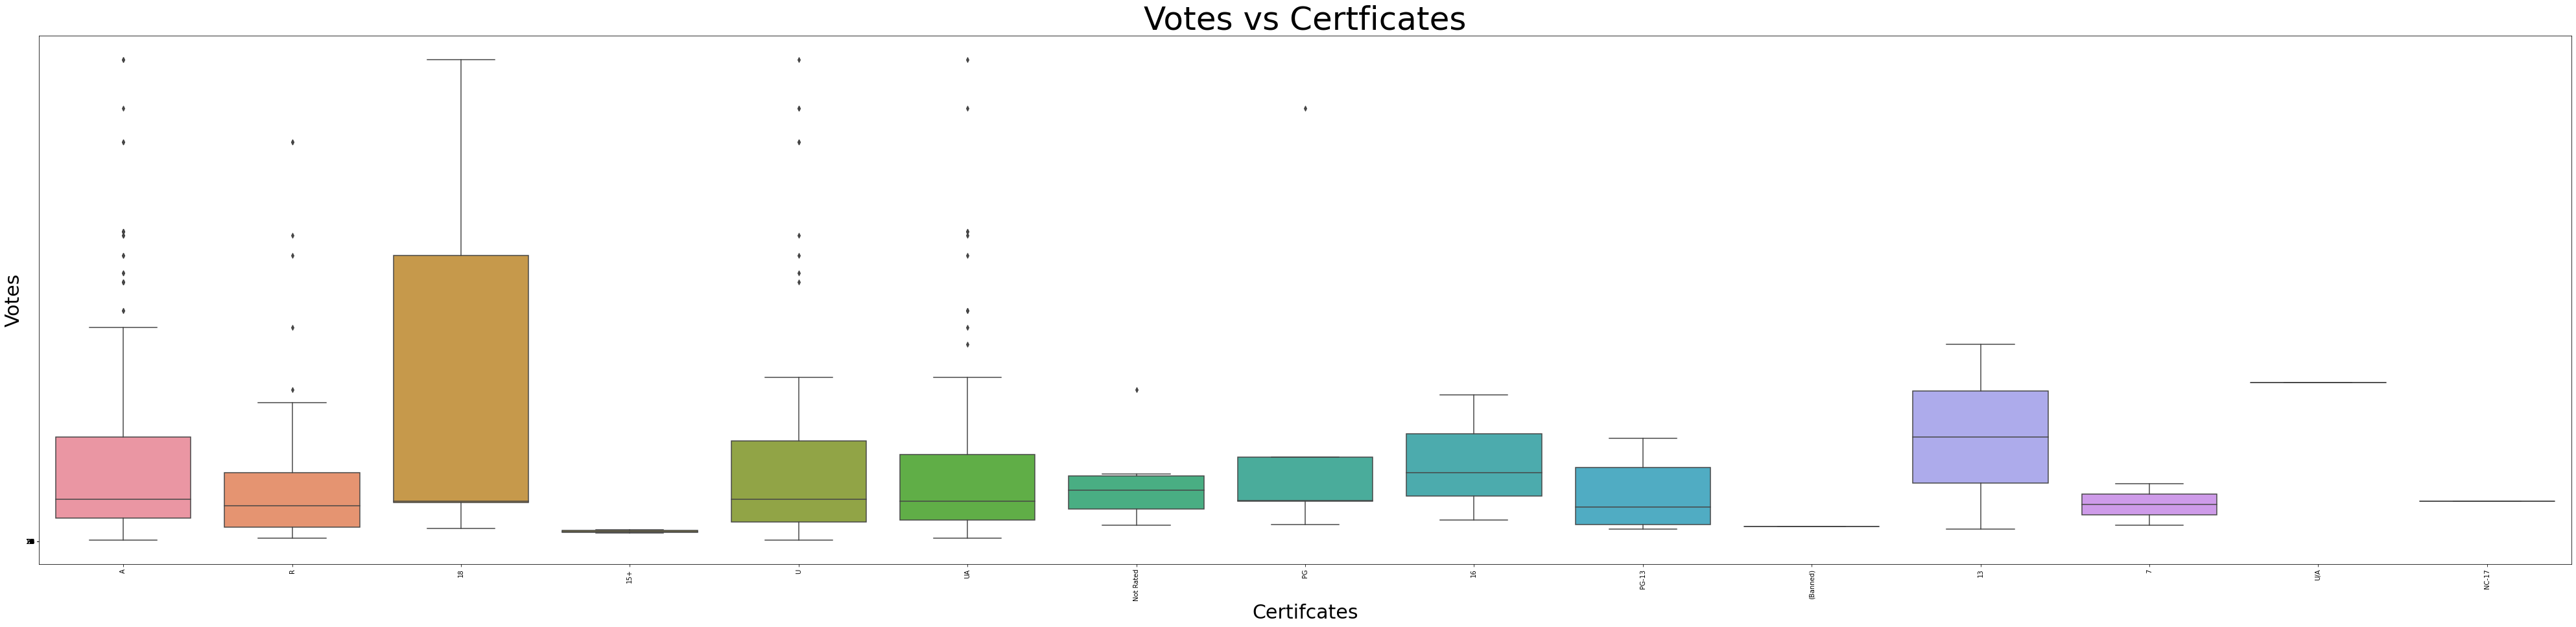

In [40]:
plt.figure(figsize=(70,15))
sns.boxplot(x='Certificate',y='Votes',data=data)
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,28,2))
plt.xlabel('Certifcates',fontsize=30)
plt.ylabel('Votes',fontsize=30)
plt.title('Votes vs Certficates',fontsize=50)
plt.show()

###  From this analysis most of the people are voted for (18) Certificate

## Bar graph for Certificate & Rating

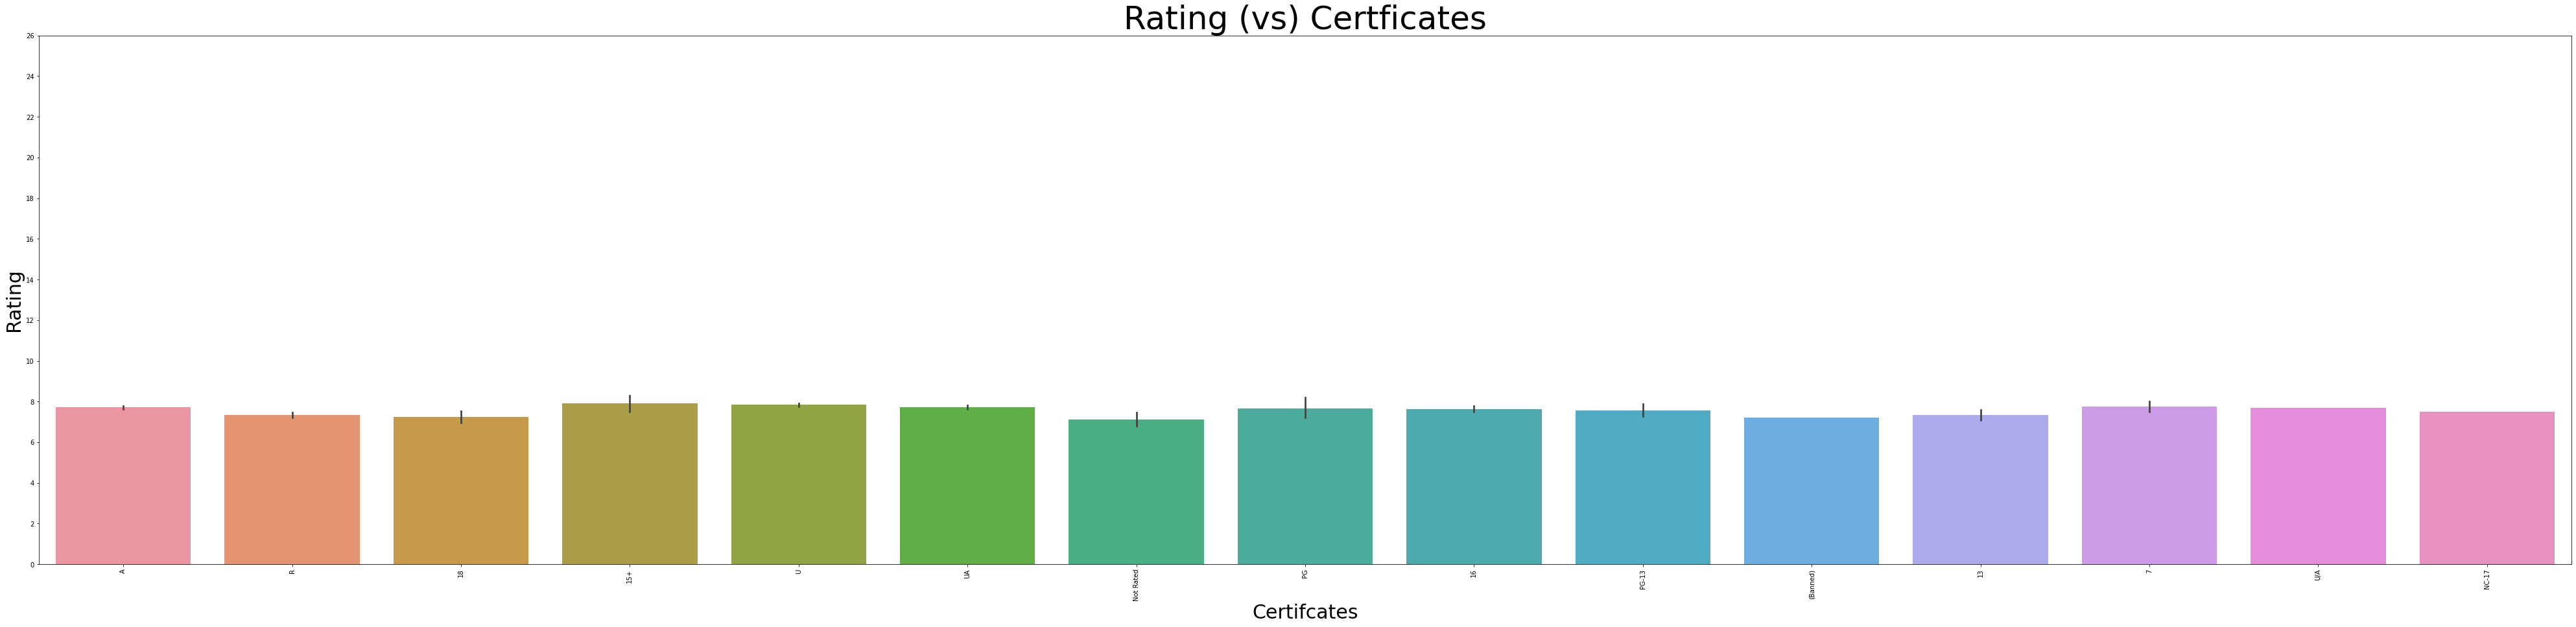

In [41]:
plt.figure(figsize=(70,15))
sns.barplot(x='Certificate',y='Rating',data=data)
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,28,2))
plt.xlabel('Certifcates',fontsize=30)
plt.ylabel('Rating',fontsize=30)
plt.title('Rating (vs) Certficates',fontsize=50)
plt.show()

## Violon Plot

C:\Users\NaveenNani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


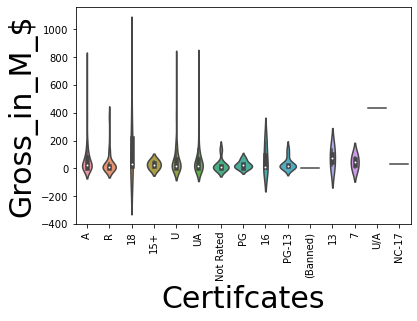

In [42]:
sns.violinplot(data['Certificate'],data['Gross_in_M_$'])
plt.xticks(rotation = 90)

plt.xlabel('Certifcates',fontsize=30)
plt.ylabel('Gross_in_M_$',fontsize=30)
plt.show()

### From this plot U\A cetrified movies had more Gross

## Multi variate analysis

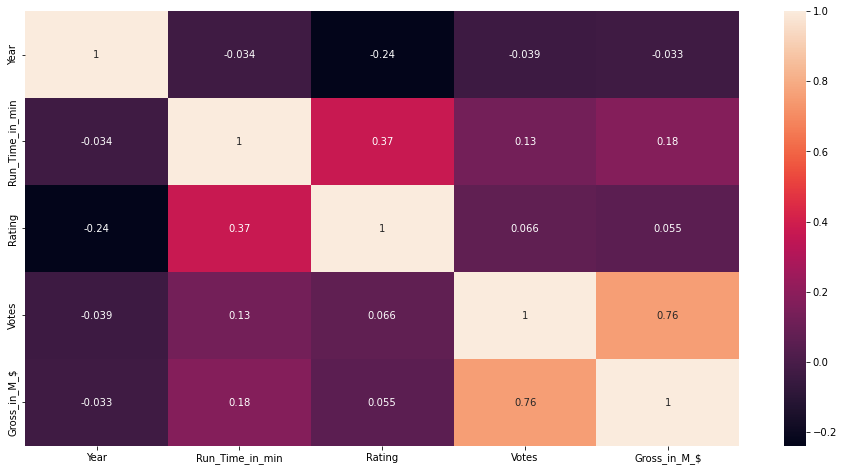

In [44]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot= True,linecolor='c');

##  Pair Plot for Year

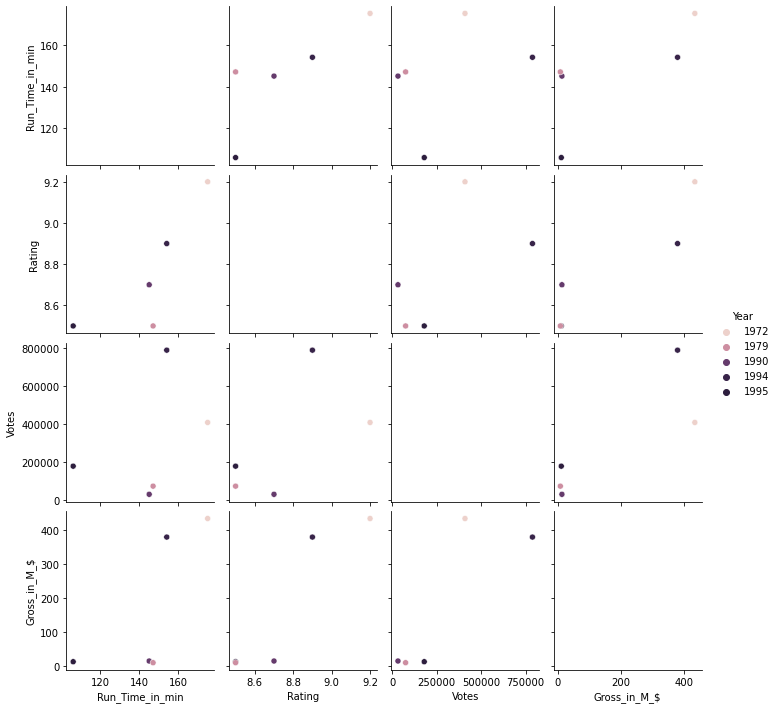

In [45]:
sns.pairplot(data.head(), hue = ('Year'))
plt.show()

In [46]:
data

Movie_Name  Year  Run_Time_in_min Certificate  Rating  \
0                The Godfather  1972              175           A     9.2   
1                   Goodfellas  1990              145           A     8.7   
2                 Pulp Fiction  1994              154           A     8.9   
3           The Usual Suspects  1995              106           A     8.5   
4               Apocalypse Now  1979              147           R     8.5   
..                         ...   ...              ...         ...     ...   
525   Ferris Bueller's Day Off  1986              103           U     7.8   
526  I Love You Phillip Morris  2009              102           R     6.6   
527                      Choke  2008               92           R     6.4   
528              The Conjuring  2013              112           A     7.5   
529                  Body Heat  1981              113          18     7.4   

                                     Genre   Votes  Gross_in_M_$  
0                 Crime, Drama              408693        435.11  
1      Biography, Crime, Drama               31290         13.56  
2                 Crime, Drama              788510        380.26  
3        Crime, Drama, Mystery              179202         11.50  
4          Drama, Mystery, War               74217          8.62  
..                                     ...     ...           ...  
525                     Comedy              358202         70.14  
526   Biography, Comedy, Crime               96420          2.04  
527              Comedy, Drama               32753          2.93  
528  Horror, Mystery, Thriller              507280        137.40  
529      Crime, Drama, Romance               36182         24.06  

[530 rows x 8 columns]